In [40]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from typing import List, Tuple
import string
from os import walk
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef,roc_curve, auc
import seaborn as sns

In [9]:
!pwd

/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps


In [10]:
filenames = next(walk('/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/gt/'), (None, None, []))[2]

In [11]:
filenames

['P11802.npy',
 'P19784.npy',
 'P24941.npy',
 'P50750.npy',
 'Q16539.npy',
 'P67870.npy',
 'P06493.npy',
 'P17612.npy',
 'P68400.npy',
 'P28482.npy',
 'Q00535.npy',
 'P27361.npy',
 'O43741.npy']

In [119]:
def getCmaps(file,path):
    gt=np.load(path+'gt/'+file)
    esm=np.load(path+'esm_cmaps/'+file)
    alpha=np.load(path+'alpha_fold_cmaps/'+file)
    pcons=np.load(path+'pconsc4/'+file)
    pcons=pcons >= 0.5
    pcons=np.multiply(pcons,1)
    #rand=np.load(path+'esm/'+file)
    rand=np.load(path+'rand_cmaps/'+file)
    return gt,alpha,esm,pcons,rand

In [152]:
gt,alpha,esm,pcons,rand=getCmaps('P67870.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')

In [111]:
gt_f=gt.flatten()
alpha_f=alpha.flatten()
esm_f=esm.flatten()
pcons_f=pcons.flatten()
rand_f=rand.flatten()

mcc_alpha=matthews_corrcoef(gt_f,alpha_f)
mcc_pcons=matthews_corrcoef(gt_f,pcons_f)
mcc_esm=matthews_corrcoef(gt_f,esm_f)
mcc_rand=matthews_corrcoef(gt_f,rand_f)

print(mcc_alpha,mcc_pcons,mcc_esm,mcc_rand)

0.16216216216216217 0.05226616647254786 0.21666198314867466 0.004403588184459959


In [112]:
f_alpha=f1_score(gt_f,alpha_f)
f_esm=f1_score(gt_f,esm_f)
f_pcons=f1_score(gt_f,pcons_f)
f_rand=f1_score(gt_f,rand_f)

In [115]:
print(f_alpha,f_pcons,f_esm,f_rand)

0.16666666666666666 0.11902956785443518 0.04873477038425492 0.016129032258064516


In [114]:
f_alpha=precision_score(gt_f,alpha_f)
f_esm=precision_score(gt_f,esm_f)
f_pcons=precision_score(gt_f,pcons_f)
f_rand=precision_score(gt_f,rand_f)

In [142]:
sns.set(font_scale =1.25,style="white")
#marker_size=3
cmap=plt.cm.get_cmap('Blues')
cmap=cmap.reversed()

In [57]:
def comparision_contactMaps(gt,alpha,esm,pcons,rand,results_path,file):
    fig = plt.figure()
#     title_text='Comparative Analysis of Contact Maps - %s'%(file)
#     fig.suptitle(title_text, fontsize=11,fontweight='bold')
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
    #fig.suptitle(title_text, fontsize=14,fontweight='bold')
    ax[0].title.set_text('Groundtruth (PDB)')
    ax[0].imshow(gt,cmap="Blues")
    #ax[0].invert_yaxis()
    
    ax[1].title.set_text('AlphaFold2')
    ax[1].imshow(alpha,cmap="Blues")
    #ax[1].invert_yaxis()
    
    ax[2].title.set_text('Pconsc4')
    ax[2].imshow(pcons,cmap="Blues")
    #ax[2].invert_yaxis()
    
    ax[3].title.set_text('ESM')
    ax[3].imshow(esm,cmap="Blues")
    #ax[3].invert_yaxis()
    
    ax[4].title.set_text('Random')
    ax[4].imshow(rand,cmap="Blues")
    #ax[4].invert_yaxis()
    ax[2].set_xlabel('Amino acids')
    ax[0].set_ylabel('Amino acids')
    fig.tight_layout()
    final_result_path=results_path+file[:-4]+".pdf"
    final_result_path1=results_path+file[:-4]+".png"
    
    fig.savefig(final_result_path, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path1, dpi=300, bbox_inches='tight')

In [129]:
gt.shape[1]

272

In [148]:
def comparision_contactMaps(gt,alpha,esm,pcons,rand,results_path,file):
    fig = plt.figure()
#     title_text='Comparative Analysis of Contact Maps - %s'%(file)
#     fig.suptitle(title_text, fontsize=11,fontweight='bold')
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 12))
    #fig.suptitle(title_text, fontsize=14,fontweight='bold')
    ax[0].set_aspect('equal', adjustable='box')
    ax[0].title.set_text('Groundtruth (PDB)')
    ax[0].imshow(gt,cmap=cmap)
#     ax[0].set_ylim([0,gt.shape[1]])
#     ax[0].set_xlim([0,gt.shape[1]])
    #ax[0].invert_yaxis()
    
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].title.set_text('AlphaFold2')
    ax[1].imshow(alpha,cmap=cmap)
#     ax[1].set_ylim([0,gt.shape[1]])
#     ax[1].set_xlim([0,gt.shape[1]])
    #ax[1].invert_yaxis()
    ax[2].set_aspect('equal', adjustable='box')
    ax[2].title.set_text('Pconsc4')
    ax[2].imshow(pcons,cmap=cmap)
#     ax[2].set_ylim([0,gt.shape[1]])
#     ax[2].set_xlim([0,gt.shape[1]])
    #ax[2].invert_yaxis()
    ax[3].set_aspect('equal', adjustable='box')
    ax[3].title.set_text('ESM')
    ax[3].imshow(esm,cmap=cmap)
#     ax[3].set_ylim([0,gt.shape[1]])
#     ax[3].set_xlim([0,gt.shape[1]])
    #ax[3].invert_yaxis()
    ax[4].set_aspect('equal', adjustable='box')
    ax[4].title.set_text('Random')
    ax[4].imshow(rand,cmap=cmap)
#     ax[4].set_ylim([0,gt.shape[1]])
#     ax[4].set_xlim([0,gt.shape[1]])
    #ax[4].invert_yaxis()
    ax[2].set_xlabel('Amino acids')
    ax[0].set_ylabel('Amino acids')
    fig.tight_layout()
    final_result_path=results_path+file[:-4]+".pdf"
    final_result_path1=results_path+file[:-4]+".png"
    
    fig.savefig(final_result_path, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path1, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

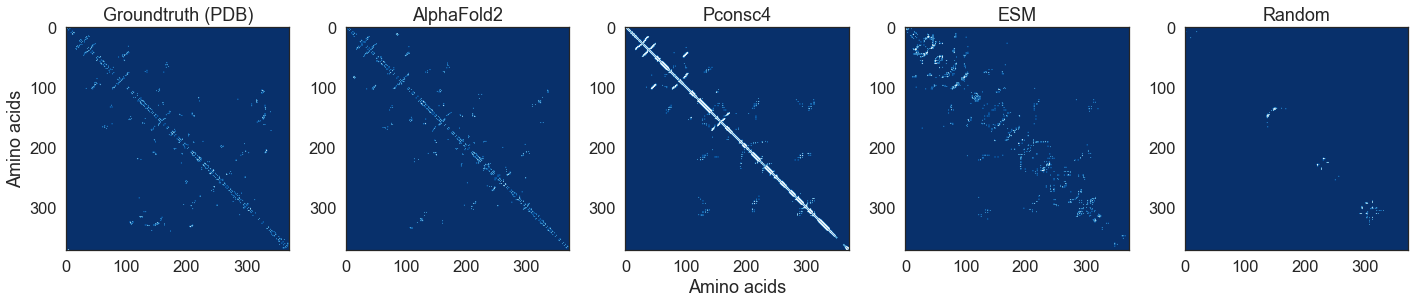

In [117]:
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results/",'P67870.npy')

<Figure size 432x288 with 0 Axes>

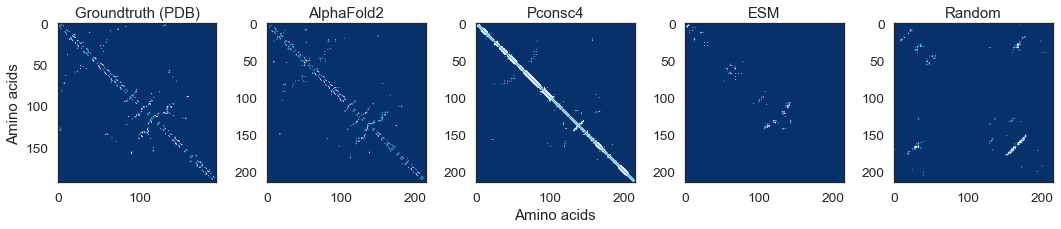

In [153]:
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results/",'P67870.npy')

<Figure size 432x288 with 0 Axes>

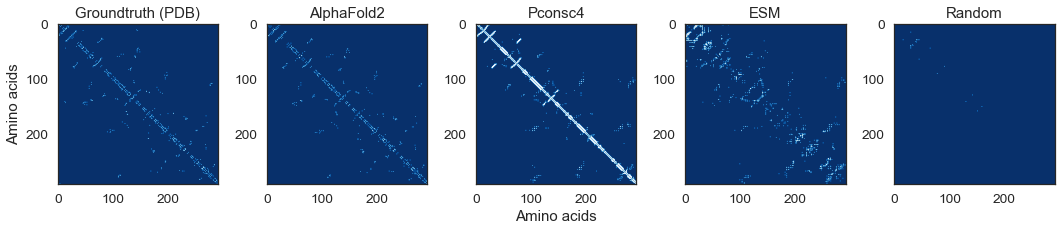

In [149]:
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results/",'Q00535.npy')

<Figure size 432x288 with 0 Axes>

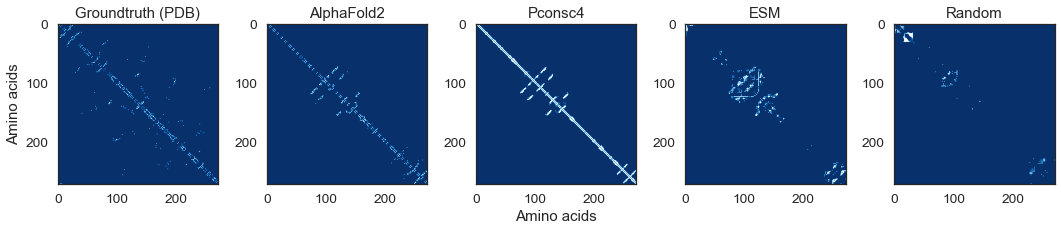

In [151]:
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results/",'O43741.npy')

In [34]:
np.shape(alpha)

(372, 372)

In [ ]:
def compareContactMaps_Difference7(contact_pdb,contact_esm,pdb_name,results_path):
    """ Compare contact maps generated by ESM_1b vs PDB and compute accuracy."""
    print(contact_pdb.shape[0],contact_esm.shape[0])
    if contact_pdb.shape[0]==contact_esm.shape[0]:
        fig = plt.figure()
        title_text='Contact Map Analysis ESM vs PDB- %s'%(pdb_name)
        fig.suptitle(title_text, fontsize=11,fontweight='bold')
        contact_esm_flatten=contact_esm.flatten()
        print(contact_esm_flatten.shape)
        contact_pdb_flatten=contact_pdb.flatten()
        acc,f1=accuracy_score(contact_pdb_flatten,contact_esm_flatten),f1_score(contact_pdb_flatten,contact_esm_flatten)
        print("F1")
        print(f1)
        gt=np.where(contact_pdb == 1)
        pred=np.where(contact_esm == 1)
        fps=np.where(contact_pdb-contact_esm==-1)
        tps=np.where(contact_esm+contact_pdb==2)
        fns=np.where(contact_pdb-contact_esm==1)
        #precision=len(tps[0])/(len(tps[0])+len(fps[0]))
        prec,recall=precision_score(contact_pdb_flatten,contact_esm_flatten),recall_score(contact_pdb_flatten,contact_esm_flatten)
        mcc=matthews_corrcoef(contact_pdb_flatten,contact_esm_flatten)
        fpr, tpr, thresholds = roc_curve(contact_pdb_flatten,contact_esm_flatten)
        print(fpr)
        print(tpr)
        print(thresholds)
        #recall=len(tps[0])/(len(tps[0])+len(fns[0]))
        #f1_score1=(2*precision*recall)/(precision+recall)
        #print("F1-score")
        #print(f1_score1)
        #fig = plt.figure()
        
        scatter1 = plt.scatter(gt[0],gt[1],c='grey',marker=".",label="Groundtruth")
        scatter2 = plt.scatter(fps[0],fps[1],c='red', marker="x", label="False Positive")
        scatter3=plt.scatter(tps[0],tps[1],c='blue', marker="o",label="True Positive")
        #scatter4=plt.scatter(fns[0],fns[1],c='orange', marker="v",label="False Negative")
        #ax[0].title.set_text('ESM-1b vs PDB CMs')
        plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.05))
        ax1 = scatter1.axes
        ax1.invert_yaxis()
        ax2 = scatter2.axes
        ax2.invert_yaxis()
        ax3 = scatter3.axes
        ax3.invert_yaxis()
#         ax4 = scatter4.axes
#         ax4.invert_yaxis()
#         if len(gt[0])==0:
#             p_tps=0
#             p_fps=0
#         else:
#             p_tps=len(tps[0])/len(gt[0])
#         #p_fps=(len(fps[0])+len(fns[0]))/len(gt[0])
#             p_fps=len(fps[0])/len(gt[0])
        #resultstr = 'Metrics\n True pred percent:%.2f\n False pred percent:%.2f'%(p_tps,p_fps)
    
        resultstr = 'Metrics\n Precision:%.2f\n Recall:%.2f\n F1-Score:%.2f\n MCC:%.2f'%(prec,recall,f1,mcc)
        plt.text(contact_esm.shape[0]+8, contact_esm.shape[0]/2+4, resultstr, fontsize=11)
        fig.tight_layout()
        final_result_path=results_path+pdb_name+".pdf"
        fig.savefig(final_result_path, bbox_inches='tight')
        return prec,recall,f1,mcc,fpr,tpr
    else:
        print('FASTA and PDB are differentt for' +str(pdb_name))
        return None,None,None,None,None,None

In [23]:
file='P11802.npy'

'P11802'